In [1]:
import pandas as pd

train_data = pd.read_csv('../datasets/LoanTrainData.csv')

train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
X = train_data[['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y = train_data.Loan_Status

X.Education.replace(('Graduate','Not Graduate'), (1,0), inplace=True)
X.Self_Employed.replace(('Yes','No'), (1,0), inplace=True)
X.Dependents.replace(('0','1','2','3+'),(0,1,2,3), inplace= True)

X.LoanAmount = X.LoanAmount.fillna(X.LoanAmount.mean())
X.Dependents = X.Dependents.fillna(X.Dependents.median())
X.Education = X.Education.fillna(X.Education.median())
X.Self_Employed = X.Self_Employed.fillna(X.Self_Employed.median())
X.ApplicantIncome = X.ApplicantIncome.fillna(X.ApplicantIncome.mean())
X.CoapplicantIncome = X.CoapplicantIncome.fillna(X.CoapplicantIncome.mean())
X.Loan_Amount_Term = X.Loan_Amount_Term.fillna(X.Loan_Amount_Term.median())
X.Credit_History = X.Credit_History.fillna(X.Credit_History.median())

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
import matplotlib.pyplot as plt
import statistics
%matplotlib inline


new_dict = {"0": [], "1": []}
for x,p in list(zip(X.Self_Employed,y)):
    for i in ['0','1']:
        if x == int(i) and p == 'Y' :
            new_dict[i].append(x)
average = []
for i in ['0','1']:
    average.append(len(new_dict[i])/len(X.Dependents) * 100)
    
average

5403.459283387622 Total mean
6109.041673387178 Standard Deviation
1703.0081433224755 Total mean (approved)
4568.965492184783 Standard Deviation (approved)


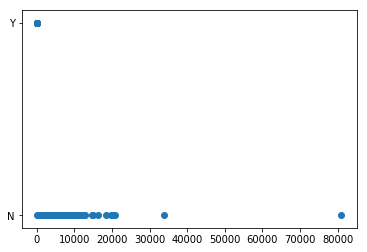

In [49]:
approved = [x if p == 'N' else 0 for x,p in list(zip(X.ApplicantIncome, y))]

print(statistics.mean(X.ApplicantIncome), "Total mean")
print(statistics.stdev(X.ApplicantIncome), "Standard Deviation")

print(statistics.mean(approved), "Total mean (approved)")
print(statistics.stdev(approved), "Standard Deviation (approved)")


plt.scatter(approved, y)
plt.show()

import numpy as np
index = np.arange(len(new_dict))

plt.bar(index, average)
plt.show()

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

from sklearn import metrics

print (metrics.accuracy_score(y,y_pred))
y_pred

test_data = pd.read_csv('../datasets/LoanTestData.csv')

X_test = test_data[['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

X_test.Education.replace(('Graduate','Not Graduate'), (1,0), inplace=True)
X_test.Self_Employed.replace(('Yes','No'), (1,0), inplace=True)
X_test.Dependents.replace(('1','2','3','3+'),(1,2,3,4), inplace= True)

X_test.LoanAmount = X_test.LoanAmount.fillna(X_test.LoanAmount.mean())
X_test.Dependents = X_test.Dependents.fillna(X_test.Dependents.median())
X_test.Education = X_test.Education.fillna(X_test.Education.median())
X_test.Self_Employed = X_test.Self_Employed.fillna(X_test.Self_Employed.median())
X_test.ApplicantIncome = X_test.ApplicantIncome.fillna(X_test.ApplicantIncome.mean())
X_test.CoapplicantIncome = X_test.CoapplicantIncome.fillna(X_test.CoapplicantIncome.mean())
X_test.Loan_Amount_Term = X_test.Loan_Amount_Term.fillna(X_test.Loan_Amount_Term.median())
X_test.Credit_History = X_test.Credit_History.fillna(X_test.Credit_History.median())

y_test_predict = logreg.predict(X_test)

dictionary = list(zip(test_data.Loan_ID,y_test_predict))
dictionary

df = pd.DataFrame(dictionary, columns = ['Loan_ID','Loan_Status'])

df.to_csv("../predicted.csv")
df